In [1]:
!pip install pandas
!pip install folium
!pip install geopandas

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
    Complete output from command python setup.py egg_info:
    Proj executable not found. Please set PROJ_DIR variable.
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\Liz\AppData\Local\Temp\pip-install-8xpg5eez\pyproj\


In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQa7xqdHPBv0l001dydV5JuDvAaUh7um07FkH3YVntOj-v43BxUcZnK3L0XgqFUXncfSA38IM77hU14/pub?gid=794529442&single=true&output=csv")
df2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRELikdBBJHlgSjMkGjNP6CQL5VwxrD92vVIdMDAfi58x3VHJG0dY7SjhvhGOdt-0b42b08j-YlDBY8/pub?output=csv")
df2.head()

,lng,lat,Label
0,-78.7439,35.87432,Ebenezer Church
1,-78.8161,35.88265,Pleasant Grove Church
2,-78.7478,35.88459,Raleigh Christian Life Fellowship Church
3,-78.7778,35.88737,Mount Herman Church
4,-78.9903,35.88765,Barbees Church


In [7]:
def make_point(row):
    return Point(row.lng, row.lat)

def make_marker(row):
  return Markers(row.Label)
  
pointsL = df.apply(make_point, axis=1)
pickupLocations = gpd.GeoDataFrame(df, geometry=pointsL)
pickupLocations.crs = {'init': 'epsg:4326'}
pickupLocations.head()
pointsC = df2.apply(make_point, axis=1)
churchLocations = gpd.GeoDataFrame(df2, geometry=pointsC)
churchLocations.crs = {'init': 'epsg:4326'}
churchLocations.head()


,lng,lat,Label,geometry
0,-78.7439,35.87432,Ebenezer Church,POINT (-78.7439 35.87432)
1,-78.8161,35.88265,Pleasant Grove Church,POINT (-78.81610000000001 35.88265)
2,-78.7478,35.88459,Raleigh Christian Life Fellowship Church,POINT (-78.7478 35.88459)
3,-78.7778,35.88737,Mount Herman Church,POINT (-78.7778 35.88737)
4,-78.9903,35.88765,Barbees Church,POINT (-78.9903 35.88765)


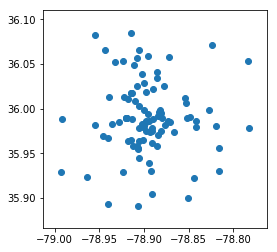

In [9]:
pickupLocations.plot()

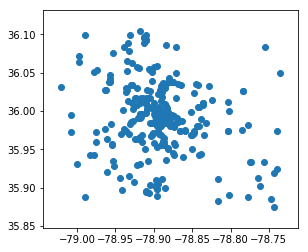

In [10]:
churchLocations.plot()

In [11]:
bounds = folium.GeoJson(churchLocations).get_bounds()
center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
m = folium.Map(
  location=center,
  zoom_start=12,
  tiles='OpenStreetMap'  
)

# Red markers are churches
# for index, row in churchLocations.iterrows():
#   folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='red', fill_color='red').add_to(m)

# Blue markers are 2018 pickup locations
for index, row in pickupLocations.iterrows():
  folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='blue', fill_color='blue').add_to(m)
m

In [69]:
# Read Tiger file of NC census tracts
ctracts = gpd.read_file("tl_2017_37_tract/tl_2017_37_tract.shp")
# Restrict to Durham County
dtracts = ctracts[ctracts.COUNTYFP=='063']
dtracts.head()
#dtracts.dtypes

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
408,37,063,001002,37063001002,10.02,Census Tract 10.02,G5020,S,3348805,0,+35.9956123,-078.8698178,"POLYGON ((-78.88070399999999 35.998738, -78.87..."
409,37,063,001100,37063001100,11,Census Tract 11,G5020,S,1396021,0,+35.9901712,-078.8900791,"POLYGON ((-78.89711699999999 35.990498, -78.89..."
410,37,063,001301,37063001301,13.01,Census Tract 13.01,G5020,S,729944,757,+35.9800040,-078.8991045,"POLYGON ((-78.90840799999999 35.97956, -78.907..."
411,37,063,001303,37063001303,13.03,Census Tract 13.03,G5020,S,1498811,0,+35.9728648,-078.9011771,"POLYGON ((-78.90870799999999 35.975495, -78.90..."
412,37,063,001304,37063001304,13.04,Census Tract 13.04,G5020,S,1729366,0,+35.9666576,-078.9098103,"POLYGON ((-78.92167599999999 35.967415, -78.92..."


In [82]:
# Read csv of poverty data
pdata = pd.read_csv("ACS_17_5YR_B14006_with_ann.csv",header=[0,1])
# Select only columns of interest
pdata = pdata[['GEO.id2','HD01_VD22']]
pdata = pdata.rename(index=str, columns={"GEO.id2": "GEOID2", "HD01_VD22": "GS_Pov_N"})
pdata['GEOID2'] = pdata['GEOID2'].astype(str)
pdata.head()
#pdata.dtypes

,GEOID2,GS_Pov_N
,Id2,Estimate; Grade school below the poverty line
0,37063000101,372
1,37063000102,267
2,37063000200,0
3,37063000301,157
4,37063000302,81


In [81]:
# Plot census tract boundaries
bounds = folium.GeoJson(churchLocations).get_bounds()
center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
m = folium.Map(
  location=center,
  zoom_start=12,
  tiles='OpenStreetMap'  
)

# Red markers are churches
# for index, row in churchLocations.iterrows():
#   folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='red', fill_color='red').add_to(m)

# Add census tracts
# Add the color for the chloropleth:
folium.Choropleth(
    geo_data=dtracts,
    data=pdata,
    columns=['GEOID2', 'GS_Pov_N'],
    key_on='feature.properties.GEOID',
    fill_color='YlGn',
).add_to(m)

#folium.GeoJson(dtracts).add_to(m)

# Blue markers are 2018 pickup locations
for index, row in pickupLocations.iterrows():
  folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='blue', fill_color='blue').add_to(m)

m

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''